## Examining The Data
Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You'd like to figure out what the expected profit of a new food truck might be given only the population of the city that it would be placed in.

In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
path = os.getcwd() + '/data/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

data.head()

Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233

In [9]:
data.describe()

Population     Profit
count   97.000000  97.000000
mean     8.159800   5.839135
std      3.869884   5.510262
min      5.026900  -2.680700
25%      5.707700   1.986900
50%      6.589400   4.562300
75%      8.578100   7.046700
max     22.203000  24.147000

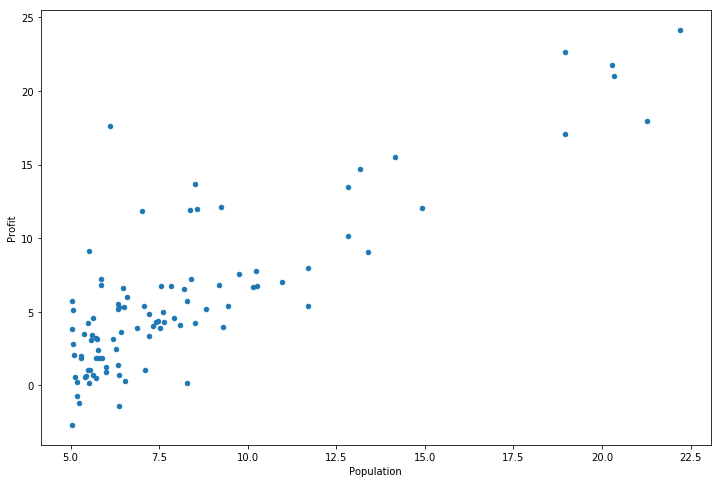

In [10]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12, 8))

In this implementation we're going to use an optimization technique called gradient descent to find the parameters theta. If you're familiar with linear algebra, you may be aware that there's another way to find the optimal parameters for a linear model called the "normal equation" which basically solves the problem at once using a series of matrix calculations. However, the issue with this approach is that it doesn't scale very well for large data sets. In contrast, we can use variants of gradient descent and other optimization methods to scale to data sets of unlimited size, so for machine learning problems this approach is more practical.

The cost function evaluates the quality of our model by calculating the error between our model's prediction for a data point, using the model parameters, and the actual data point. For example, if the population for a given city is 4 and we predicted that it was 7, our error is (7-4)^2 = 3^2 = 9 (assuming an L2 or "least squares" loss function). We do this for each data point in X and sum the result to get the cost. Here's the function:

In [11]:
def computeCost(X, y, theta):
	inner = np.power(((X * theta.T) - y), 2)
	return np.sum(inner) / (2 * len(X))

* First, we need to insert a column of 1s at the beginning of the data frame in order to make the matrix operations work correctly
* Second, we need to separate our data into independent variables X and our dependent variable y.

In [12]:
# append a ons column to the front of the data set
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:, 0 : cols - 1]
y = data.iloc[:, cols - 1:cols]


In [13]:
# conver from data frames to numpy matrics
X = np.matrix(X.values)
y = np.matrix(y.values)

theta = np.matrix(np.array([0, 0]))

One useful trick to remember when debugging matrix operations is to look at the shape of the matrices you're dealing with. It's also helpful to remember when walking through the steps in your head that matrix multiplications look like (i x j) * (j x k) = (i x k), where i, j, and k are the shapes of the relative dimensions of the matrix.

In [14]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [15]:
# Try our cost function. Remember the parameters were initialized to 0 so the solution isn't optimal yet, but we can see if it works.
computeCost(X, y, theta)

32.072733877455676

Now we need to define a function to perform gradient descent on the parameters theta using the update rules defined in the exercise text. Here's the function for gradient descent:

In [16]:
def gradientDescent(X, y, theta, alpha, iters):
	temp = np.matrix(np.zeros(theta.shape))
	parameters = int(theta.ravel().shape[1])
	cost = np.zeros(iters)
	
	for i in range(iters):
		error = (X * theta.T) - y
		
		for j in range(parameters):
			term = np.multiply(error, X[:, j])
			temp[0, j] = theta[0, j] - ((alpha / len(X)) * np.sum(term))
		
		theta = temp
		cost[i] = computeCost(X, y, theta)
		
	return theta, cost

The idea with gradient descent is that for each iteration, we compute the gradient of the error term in order to figure out the appropriate direction to move our parameter vector. In other words, we're calculating the changes to make to our parameters in order to reduce the error, thus bringing our solution closer to the optimal solution (i.e best fit).

In [17]:
theta.shape

(1, 2)

In [18]:
# alpha set up a stepsize
alpha = 0.01

# iter set up a number of iteration
iters = 1000

# perform gradient descent to "fit" the model parameters
g, cost = gradientDescent(X, y, theta, alpha, iters)

In [19]:
g

matrix([[-3.24140214,  1.1272942 ]])

In [20]:
# calculate cost 
computeCost(X, y, g)

4.515955503078912

Let's overlay a line representing our model on top of a scatter plot of the data to see how well it fits. We can use numpy's "linspace" function to create an evenly-spaced series of points within the range of our data, and then "evaluate" those points using our model to see what the expected profit would be. We can then turn it into a line graph and plot it.

Text(0.5,1,'Predicted Profit vs. Population Size')

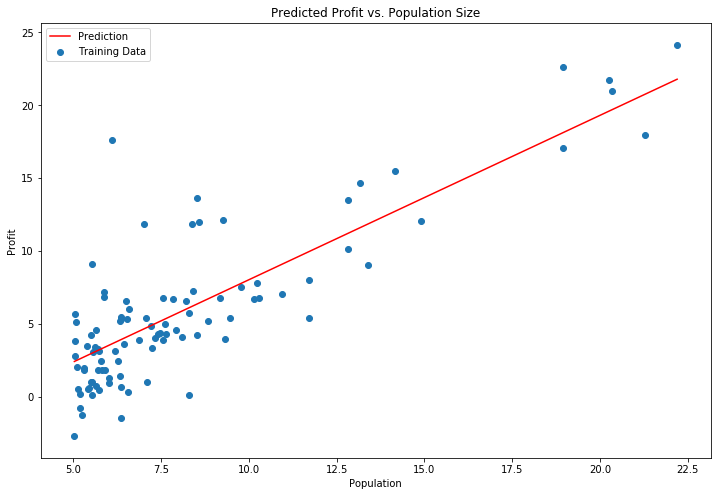

In [21]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Training Data')
ax.legend(loc=2)
ax.set_xlabel("Population")
ax.set_ylabel("Profit")
ax.set_title("Predicted Profit vs. Population Size")

Since the gradient decent function also outputs a vector with the cost at each training iteration, we can plot that as well.

Text(0.5,1,'Error vs. Training Epoch')

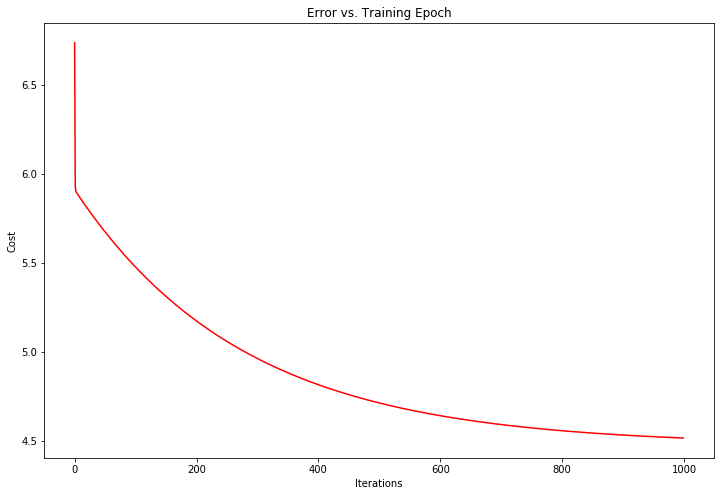

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

Notice that the cost always decreases - this is an example of what's called a convex optimization problem. If you were to plot the entire solution space for the problem (i.e. plot the cost as a function of the model parameters for every possible value of the parameters) you would see that it looks like a "bowl" shape with a "basin" representing the optimal solution.

It's worth noting that we don't HAVE to implement any algorithms from scratch to solve this problem. The great thing about Python is its huge developer community and abundance of open-source software. In the machine learning realm, the top Python library is scikit-learn. Let's see how we could have handled our simple linear regression task from part 1 using scikit-learn's linear regression class.

In [23]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

It doesn't get much easier than that. There are lots of parameters to the "fit" method that we could have tweaked depending on how we want the algorithm to function, but the defaults are sensible enough for our problem that I left them alone. Let's try plotting the fitted parameters to see how it compares to our earlier results.

Text(0.5,1,'Predicted Profit vs. Population Size')

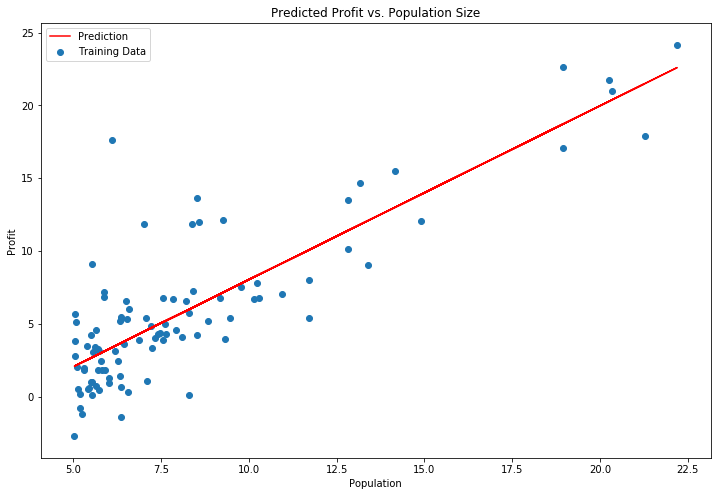

In [24]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')